In [3]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

<b>Reading files</b>

# Data Understanding 
Reading Companies, rounds2 files data

In [4]:
companies = pd.read_csv("companies.csv", encoding= 'ANSI')
rounds2 = pd.read_csv("rounds2.csv", encoding= 'ANSI')

In [5]:
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [6]:
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


<b>Checking Permalink and company permalink has null values or not</b>

In [7]:
companies.isnull().sum()

permalink            0
name                 1
homepage_url      5058
category_list     3148
status               0
country_code      6958
state_code        8547
region            8030
city              8028
founded_at       15221
dtype: int64

In [8]:
rounds2.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
dtype: int64

# Checkpoint 1: Data Cleaning 1

# Table 1.1

<b>1 . How many unique companies are present in rounds2?</b>

In [9]:
rounds2["company_permalink"] = rounds2["company_permalink"].str.lower()

In [10]:
len(rounds2["company_permalink"].unique())

66368

<b>2.How many unique companies are present in the companies file?</b>

In [11]:
companies["permalink"] = companies["permalink"].str.lower()

In [12]:
len(companies["permalink"].unique())

66368

3.In the companies data frame, which column can be used as the  unique key for each company? Write the name of the column.<br>
<b>Ans : permalink</b>

<b>4. Are there any companies in the rounds2 file which are not  present in companies ? Answer Y/N.</b>

In [13]:
rounds2[~rounds2["company_permalink"].isin(companies["permalink"])]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd


<b>Ans : NO</b>

<b>5 .Merge the two data frames so that all  variables (columns)  in the companies frame are added to the rounds2
data frame. Name the merged frame master_frame. How many observations are present in master_frame ?</b>

In [14]:
master_frame = pd.merge(companies, rounds2, left_on=["permalink"], right_on="company_permalink")
master_frame.shape

(114949, 16)

<b>checking null values</b>

In [15]:
master_frame.isnull().sum()

permalink                      0
name                           1
homepage_url                6134
category_list               3410
status                         0
country_code                8678
state_code                 10946
region                     10167
city                       10164
founded_at                 20521
company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
dtype: int64

<b>Checking ther percentage of null values of each column</b>

In [16]:
(master_frame.isnull().sum()/master_frame.shape[0])*100

permalink                   0.000000
name                        0.000870
homepage_url                5.336280
category_list               2.966533
status                      0.000000
country_code                7.549435
state_code                  9.522484
region                      8.844792
city                        8.842182
founded_at                 17.852265
company_permalink           0.000000
funding_round_permalink     0.000000
funding_round_type          0.000000
funding_round_code         72.909725
funded_at                   0.000000
raised_amount_usd          17.390321
dtype: float64

<b>Missing values</b> <br>
checking for the missing values of raised_amount_usd  and removing

In [17]:

master_frame[master_frame["raised_amount_usd"].isnull()]

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
5,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,NaN
14,/organization/1,One Inc.,http://whatis1.com,Mobile,operating,USA,CA,SF Bay Area,San Francisco,01-08-2011,/organization/1,/funding-round/5de6d8828aef7d925d97918d15727670,undisclosed,NaN,05-02-2013,NaN
17,/organization/1-4-all,1-4 All,NaN,Entertainment|Games|Software,operating,USA,NC,NC - Other,Connellys Springs,NaN,/organization/1-4-all,/funding-round/e97a192e13ea0ee3c4f71136b4f3ec16,equity_crowdfunding,NaN,21-04-2013,NaN
18,/organization/1-618-technology,1.618 Technology,http://www.Homeandcondogallery.com,Networking|Real Estate|Web Hosting,operating,USA,FL,Orlando,Orlando,07-12-2013,/organization/1-618-technology,/funding-round/83b8f4c7d37ecef5e001a5e953bf461a,equity_crowdfunding,NaN,22-01-2014,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114899,/organization/zymr-inc-,"Zymr, Inc.",http://www.zymr.com,Android|Apps|Cloud Computing|Cloud Infrastruct...,operating,USA,CA,SF Bay Area,Santa Clara,NaN,/organization/zymr-inc-,/funding-round/9048d1a80edeae803ed1790c9f473eec,angel,NaN,12-12-2012,NaN
114905,/organization/zynergy-projects-services,Zynergy Projects & Services,http://www.zynergygroup.net/,Clean Technology,operating,IND,25,Chennai,Chennai,NaN,/organization/zynergy-projects-services,/funding-round/3d7dbd2d92220d93e2b5455f914a0918,venture,NaN,19-08-2015,NaN
114913,/organization/zynga,Zynga,http://www.zynga.com,Facebook Applications|Games|Networking|Technology,ipo,USA,CA,SF Bay Area,San Francisco,01-07-2007,/organization/zynga,/funding-round/d27f10a20b15b4ef3d9961d54eabf6b1,angel,NaN,01-01-2007,NaN
114927,/organization/zypsee,Whisk (formerly Zypsee),http://whisk.me,Public Transportation,operating,USA,NY,New York City,New York,01-01-2011,/organization/zypsee,/funding-round/c67e22c5448435adaf5a2d101e449dde,seed,NaN,26-07-2013,NaN


In [18]:
master_frame[master_frame["category_list"].isnull()]

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
99,/organization/123feng-com,123Feng.Com,http://123feng.com/,NaN,operating,CHN,2,Hangzhou,Hangzhou,01-01-2014,/organization/123feng-com,/funding-round/9d83084d87dc63a309c9a6fe9bf59d1b,venture,A,27-10-2015,13000000.0
123,/organization/15fen,15Fen,http://www.15fen.com/,NaN,operating,CHN,30,Guangzhou,Guangzhou,NaN,/organization/15fen,/funding-round/b660e2c345e5cda7db2f1e0176a450b3,seed,NaN,15-12-2013,NaN
133,/organization/17-media,17 Media,http://17.media,NaN,operating,NaN,NaN,NaN,NaN,15-07-2015,/organization/17-media,/funding-round/f8ffde9fa822843ac6ea9b66cc615df1,venture,A,05-11-2015,10000000.0
181,/organization/1mxians,1mxians,http://www.1mxian.com/,NaN,operating,CHN,22,Beijing,Beijing,01-01-2014,/organization/1mxians,/funding-round/6950448f81c6706abe61f659e15a7c87,venture,A,02-12-2015,15000000.0
185,/organization/1rp-media,1RP Media,NaN,NaN,operating,USA,CA,Los Angeles,Los Angeles,01-01-2011,/organization/1rp-media,/funding-round/f7400a94939ef73f70af0c52b54b31ce,seed,NaN,29-06-2012,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114450,/organization/zkey-com,Zkey.com,http://zkey.com/,NaN,closed,NaN,NaN,NaN,NaN,NaN,/organization/zkey-com,/funding-round/aca95e6dda1b354ebee80bca5f261607,venture,B,22-11-1999,10000000.0
114453,/organization/zlango,Zlango,http://www.zlango.com,NaN,closed,NaN,NaN,NaN,NaN,NaN,/organization/zlango,/funding-round/203baf1c533923de0bc50699a12f447e,venture,A,12-02-2007,12000000.0
114458,/organization/zlote-mysli,Zlote Mysli,http://www.zlotemysli.pl/,NaN,operating,NaN,NaN,NaN,NaN,NaN,/organization/zlote-mysli,/funding-round/0787484a3d22104c752fe8a96d57abe4,venture,A,01-01-2009,NaN
114806,/organization/zuoyebang,Zuoyebang,http://zuoye.baidu.com/,NaN,operating,NaN,NaN,NaN,NaN,NaN,/organization/zuoyebang,/funding-round/720cfd18d9f4804df5cf722ca8116ec8,venture,A,03-09-2015,NaN


In [19]:
master_frame[master_frame["country_code"].isnull()]

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
32,/organization/1000chi,Beijing 1000CHI Software Technology,http://www.1000chi.com/,Mobile,operating,NaN,NaN,NaN,NaN,01-01-2008,/organization/1000chi,/funding-round/854fae13c5b26b2ea6b32b06c2e5890c,angel,NaN,01-04-2010,43923865.0
66,/organization/10k-2,Beans Around,http://beansaround.com/,Coffee|Delivery|Subscription Service,operating,NaN,NaN,NaN,NaN,01-04-2015,/organization/10k-2,/funding-round/95401c8e8336892bf375ad94efd6c725,seed,NaN,04-09-2015,100000.0
71,/organization/10tracks-2,10tracks,http://10tracks.com,iOS|Mobile|Music,operating,NaN,NaN,NaN,NaN,01-01-2012,/organization/10tracks-2,/funding-round/74606b480fe509973a3d72c9017876ca,venture,NaN,03-02-2014,NaN
72,/organization/10tracks-2,10tracks,http://10tracks.com,iOS|Mobile|Music,operating,NaN,NaN,NaN,NaN,01-01-2012,/organization/10tracks-2,/funding-round/e31e2474786f930fd72e292ec34e9126,seed,NaN,31-07-2013,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114836,/organization/zuumtel,ZUUMTEL,http://www.zuumtel.com,Automotive|Design|Real Time,closed,NaN,NaN,NaN,NaN,16-09-2014,/organization/zuumtel,/funding-round/d5d97d7c8a5e923715b15495d44e7cb8,seed,NaN,01-04-2013,100000.0
114849,"/organization/zwayo-""on-demand-valet-parking""","Zwayo ""On-Demand Valet Parking""",http://www.zwayo.co,Apps|Cars|Parking,operating,NaN,NaN,NaN,NaN,01-09-2014,"/organization/zwayo-""on-demand-valet-parking""",/funding-round/eb5163bb6feea4384121e27699bb7b25,seed,NaN,01-09-2014,60000.0
114860,/organization/zyfin,Zyfin,http://www.zyfin.com/,Finance,operating,NaN,NaN,NaN,NaN,NaN,/organization/zyfin,/funding-round/98cef3afd5e88487a9829ff182fb1a25,venture,A,01-11-2011,NaN
114946,/organization/ãeron,ÃERON,http://www.aeron.hu/,NaN,operating,NaN,NaN,NaN,NaN,01-01-2011,/organization/ãeron,/funding-round/59f4dce44723b794f21ded3daed6e4fe,venture,A,01-08-2014,NaN


In [20]:
master_frame.shape

(114949, 16)

<b>Removing null values columns</b>

In [21]:
master_frame = master_frame[-((master_frame["raised_amount_usd"].isnull()) | (master_frame["country_code"].isnull()))]

In [22]:
master_frame.shape

(89108, 16)

<b>again check the percentage of null values in the master frame</b>

In [23]:
(master_frame.isnull().sum()/master_frame.shape[0])*100

permalink                   0.000000
name                        0.001122
homepage_url                3.790905
category_list               0.649773
status                      0.000000
country_code                0.000000
state_code                  1.967276
region                      1.343314
city                        1.339947
founded_at                 15.327468
company_permalink           0.000000
funding_round_permalink     0.000000
funding_round_type          0.000000
funding_round_code         69.770391
funded_at                   0.000000
raised_amount_usd           0.000000
dtype: float64

<b>so all the required columns does not have any null values
now check the datatypes of each column in master frams</b><br>
Country_code and raised_amt_USD

In [24]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89108 entries, 0 to 114947
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   permalink                89108 non-null  object 
 1   name                     89107 non-null  object 
 2   homepage_url             85730 non-null  object 
 3   category_list            88529 non-null  object 
 4   status                   89108 non-null  object 
 5   country_code             89108 non-null  object 
 6   state_code               87355 non-null  object 
 7   region                   87911 non-null  object 
 8   city                     87914 non-null  object 
 9   founded_at               75450 non-null  object 
 10  company_permalink        89108 non-null  object 
 11  funding_round_permalink  89108 non-null  object 
 12  funding_round_type       89108 non-null  object 
 13  funding_round_code       26937 non-null  object 
 14  funded_at            

# Checkpoint 2: Funding Type Analysis

Table 2.1

In [25]:

master_frame["funding_round_type"].value_counts()

venture                  48111
seed                     21233
debt_financing            6533
angel                     4427
grant                     1979
private_equity            1835
undisclosed               1352
convertible_note          1326
equity_crowdfunding       1136
post_ipo_equity            601
product_crowdfunding       332
post_ipo_debt              151
non_equity_assistance       63
secondary_market            29
Name: funding_round_type, dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


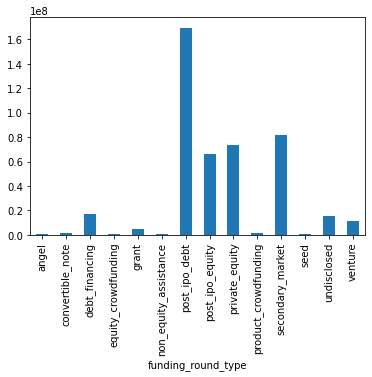

In [26]:
print(master_frame.groupby(["funding_round_type"])["raised_amount_usd"].mean().plot.bar())

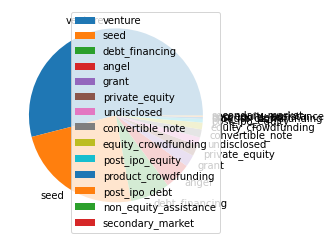

In [27]:
plot1 = master_frame["funding_round_type"].value_counts()
mylable = ['venture',              
'seed',                    
'debt_financing',          
'angel',                 
'grant',                   
'private_equity',           
'undisclosed',             
'convertible_note',        
'equity_crowdfunding',     
'post_ipo_equity',        
'product_crowdfunding',   
'post_ipo_debt',        
'non_equity_assistance',    
'secondary_market'  ]
plt.pie(master_frame["funding_round_type"].value_counts(),  labels = mylable)
plt.legend()
plt.show()

taking only four investment types(venture, angel, seed, and private equity) in the master_frame

In [28]:
master_frame = master_frame[master_frame["funding_round_type"].isin(["venture", "seed", "angel", "private_equity"])]

<b>1 to 4. Representative funding amount of venture, seed. angel, private_equity type</b>


In [29]:
print(" Venture Mode" , master_frame[master_frame["funding_round_type"] == "venture"]["raised_amount_usd"].mode())
print("angel Mode :" , master_frame[master_frame["funding_round_type"] == "angel"]["raised_amount_usd"].mode())
print("seed Mode :" , master_frame[master_frame["funding_round_type"] == "seed"]["raised_amount_usd"].mode())
print("privateEquity Mode :" , master_frame[master_frame["funding_round_type"] == "private_equity"]["raised_amount_usd"].mode())

 Venture Mode 0    10000000.0
dtype: float64
angel Mode : 0    500000.0
dtype: float64
seed Mode : 0    1000000.0
dtype: float64
privateEquity Mode : 0    100000000.0
dtype: float64


In [30]:
print("Venture mean :" , master_frame[master_frame["funding_round_type"] == "venture"]["raised_amount_usd"].mean())
print("angel mean :" , master_frame[master_frame["funding_round_type"] == "angel"]["raised_amount_usd"].mean())
print("seed mean :" , master_frame[master_frame["funding_round_type"] == "seed"]["raised_amount_usd"].mean())
print("privateEquity mean :" , master_frame[master_frame["funding_round_type"] == "private_equity"]["raised_amount_usd"].mean())

Venture mean : 11735779.935191536
angel mean : 968559.909645358
seed mean : 748104.4981867847
privateEquity mean : 73618563.61743869


<b>5. Considering that Spark Funds wants to invest between 5 to 15 million USD per  investment round,
which investment type is the most suitable for them?</b>

<b>by seeing the mean and mode its clear the <h1> venture</h1> investment type has amt between 5 million to 15 million USD</b>

#Data Analysis
# Checkpoint 3: Country Analysis

<b>choosen investment type is venture, lets assign the master_frame with only venture details</b>

In [31]:
master_frame = master_frame[master_frame["funding_round_type"] == "venture"]

In [32]:
master_frame.shape

(48111, 16)

<b>converting raised_amount_usd to million USD</b>

In [33]:
df = master_frame[(master_frame["country_code"] == "USA")]
df[df["raised_amount_usd"].between(5000000, 15000000, inclusive = True)]

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
12,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,19-07-2014,8900000.0
22,/organization/1-mainstream,1 Mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,acquired,USA,CA,SF Bay Area,Cupertino,01-03-2012,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,NaN,17-03-2015,5000000.0
103,/organization/128-technology,128 Technology,http://www.128technology.com/,Service Providers|Technology,operating,USA,MA,Boston,Burlington,07-07-2014,/organization/128-technology,/funding-round/fb6216a30cb566ede89e0bee0623a634,venture,NaN,16-12-2014,11999347.0
110,/organization/1366-technologies,1366 Technologies,http://www.1366tech.com,Manufacturing,operating,USA,MA,Boston,Bedford,01-01-2007,/organization/1366-technologies,/funding-round/424129ce1235cfab2655ee81305f7c2b,venture,C,15-10-2013,15000000.0
111,/organization/1366-technologies,1366 Technologies,http://www.1366tech.com,Manufacturing,operating,USA,MA,Boston,Bedford,01-01-2007,/organization/1366-technologies,/funding-round/6d3f3797371956ece035b8478c1441b2,venture,C,09-04-2015,5000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114910,/organization/zynga,Zynga,http://www.zynga.com,Facebook Applications|Games|Networking|Technology,ipo,USA,CA,SF Bay Area,San Francisco,01-07-2007,/organization/zynga,/funding-round/8411431b5a0389a874e3fae93016c089,venture,B,24-04-2010,15000000.0
114914,/organization/zynga,Zynga,http://www.zynga.com,Facebook Applications|Games|Networking|Technology,ipo,USA,CA,SF Bay Area,San Francisco,01-07-2007,/organization/zynga,/funding-round/eb198261da812bc8d3bf475ccec44000,venture,A,12-02-2008,5026000.0
114920,/organization/zyomyx-inc,ZYOMYX,http://www.zyomyx.com,Biotechnology,operating,USA,MO,MO - Other,Fremont,01-01-1998,/organization/zyomyx-inc,/funding-round/4191cb5258d3863b0212d1083881da64,venture,B,30-06-2013,12000000.0
114922,/organization/zyomyx-inc,ZYOMYX,http://www.zyomyx.com,Biotechnology,operating,USA,MO,MO - Other,Fremont,01-01-1998,/organization/zyomyx-inc,/funding-round/b4fce7f8a13267353d57db09099800e8,venture,NaN,11-07-2013,14219999.0


In [34]:
#master_frame["raised_amount_usd"] = master_frame["raised_amount_usd"]/1000000

In [35]:
master_frame.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0
8,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.0
10,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.0
11,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,NaN,03-01-2013,1700000.0


<b>getting sum of raised_amount_usd for each country</b>

In [36]:
top9 =  pd.pivot_table(master_frame, values="raised_amount_usd", index="country_code", aggfunc="sum")

<b>sorting the all the values in descending oreder</b>

In [37]:
top9 = top9.sort_values("raised_amount_usd", ascending=False)

<b>taking the top 9 countries </b>

In [38]:
top9 = top9[:9]
top9

,raised_amount_usd
country_code,
USA,4.225108e+11
CHN,3.983542e+10
GBR,2.024563e+10
IND,1.439186e+10
CAN,9.583332e+09
FRA,7.259537e+09
ISR,6.907515e+09
DEU,6.346960e+09
JPN,3.363677e+09


<AxesSubplot:xlabel='country_code'>

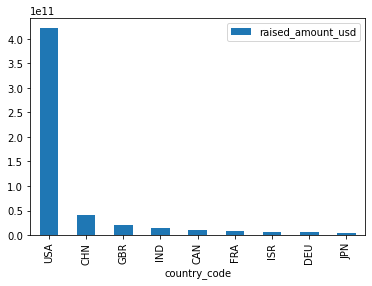

In [39]:
top9.plot.bar()

<b>Identify the top three English-speaking countries in the data frame top9.</b>

 1. Top English-speaking country  ----- <b>USA</b>            
 2. Second English-speaking country --- <b>GBR</b>
 3. Third English-speaking country ---<b>IND</b>

# Checkpoint 4: Sector Analysis 1

since sparkfunds wants to invest in the most English speaking countries, 
lets take only those coutries of investment type venture data into master.

In [40]:
df = master_frame[(master_frame["country_code"] == "USA")]
df[df["raised_amount_usd"].between(5000000, 15000000, inclusive = True)]

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
12,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,19-07-2014,8900000.0
22,/organization/1-mainstream,1 Mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,acquired,USA,CA,SF Bay Area,Cupertino,01-03-2012,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,NaN,17-03-2015,5000000.0
103,/organization/128-technology,128 Technology,http://www.128technology.com/,Service Providers|Technology,operating,USA,MA,Boston,Burlington,07-07-2014,/organization/128-technology,/funding-round/fb6216a30cb566ede89e0bee0623a634,venture,NaN,16-12-2014,11999347.0
110,/organization/1366-technologies,1366 Technologies,http://www.1366tech.com,Manufacturing,operating,USA,MA,Boston,Bedford,01-01-2007,/organization/1366-technologies,/funding-round/424129ce1235cfab2655ee81305f7c2b,venture,C,15-10-2013,15000000.0
111,/organization/1366-technologies,1366 Technologies,http://www.1366tech.com,Manufacturing,operating,USA,MA,Boston,Bedford,01-01-2007,/organization/1366-technologies,/funding-round/6d3f3797371956ece035b8478c1441b2,venture,C,09-04-2015,5000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114910,/organization/zynga,Zynga,http://www.zynga.com,Facebook Applications|Games|Networking|Technology,ipo,USA,CA,SF Bay Area,San Francisco,01-07-2007,/organization/zynga,/funding-round/8411431b5a0389a874e3fae93016c089,venture,B,24-04-2010,15000000.0
114914,/organization/zynga,Zynga,http://www.zynga.com,Facebook Applications|Games|Networking|Technology,ipo,USA,CA,SF Bay Area,San Francisco,01-07-2007,/organization/zynga,/funding-round/eb198261da812bc8d3bf475ccec44000,venture,A,12-02-2008,5026000.0
114920,/organization/zyomyx-inc,ZYOMYX,http://www.zyomyx.com,Biotechnology,operating,USA,MO,MO - Other,Fremont,01-01-1998,/organization/zyomyx-inc,/funding-round/4191cb5258d3863b0212d1083881da64,venture,B,30-06-2013,12000000.0
114922,/organization/zyomyx-inc,ZYOMYX,http://www.zyomyx.com,Biotechnology,operating,USA,MO,MO - Other,Fremont,01-01-1998,/organization/zyomyx-inc,/funding-round/b4fce7f8a13267353d57db09099800e8,venture,NaN,11-07-2013,14219999.0


In [41]:
master_frame = master_frame[master_frame["country_code"].isin(["USA", "GBR", "IND"])]

In [42]:
master_frame.shape

(39018, 16)

<b>the first string before the vertical bar will be considered the primary sector.<br>
so extract the primary sector of each category list from the category_list column</b>

In [43]:
master_frame["primarysector"] = master_frame["category_list"].astype('str').apply(lambda x: x.split('|')[0])

In [44]:
master_frame.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primarysector
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,Media
10,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.0,Analytics
11,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,NaN,03-01-2013,1700000.0,Analytics
12,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,19-07-2014,8900000.0,Analytics
22,/organization/1-mainstream,1 Mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,acquired,USA,CA,SF Bay Area,Cupertino,01-03-2012,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,NaN,17-03-2015,5000000.0,Apps


<b>Use the mapping file 'mapping.csv' to map each primary sector to one of the eight main sectors</b>

In [45]:
mapping = pd.read_csv("D:\\AI ML DL Classes\\Course 2 - Statistical analysys\\Investment Assignment\\mapping.csv",  encoding= 'ANSI')

In [46]:
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


<b>Fixing missing values and Data correction </b>

In [47]:
mapping[mapping["category_list"].str.contains("0") == True]


,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
20,Alter0tive Medicine,0,0,0,0,1,0,0,0,0
22,A0lytics,0,0,0,0,0,0,0,0,1
59,Big Data A0lytics,0,0,0,0,0,0,0,0,1
79,Business A0lytics,0,0,0,0,0,0,0,0,1
89,Can0bis,0,0,0,0,1,0,0,0,0
91,Career Ma0gement,0,0,0,0,0,0,0,0,1
103,Chi0 Internet,0,0,0,0,0,0,1,0,0
114,Cloud Ma0gement,0,0,0,0,0,0,1,0,0
145,Contact Ma0gement,0,0,0,0,0,0,0,0,1
198,Digital Rights Ma0gement,0,0,0,1,0,0,0,0,0


found na is replcaed with 0 in the mapping file,<br>
<b>Replace 0 with na </b>

In [48]:
mapping["category_list"] = mapping["category_list"].astype(str).apply(lambda x: x.replace("0","na"))

<b>'Enterprise 2.0' 0 is replaced by "na", replacing that as well to correct the data</b>

In [49]:
mapping['category_list'] = mapping['category_list'].replace(['Enterprise 2.na'],'enterprise 2.0')

<b>seems it mapping is pivoted file, let unpivot the file</b>

In [50]:
mapping = pd.melt(mapping, id_vars =['category_list'], value_vars =['Manufacturing','Automotive & Sports',
                                                              'Cleantech / Semiconductors','Entertainment',
                                                             'Health','News, Search and Messaging','Others',
                                                             'Social, Finance, Analytics, Advertising'], var_name='main_sector') 


In [51]:
mapping[mapping["category_list"].str.endswith(".na") == True]

,category_list,main_sector,value


In [52]:
mapping.head()

,category_list,main_sector,value
0,nan,Manufacturing,0
1,3D,Manufacturing,1
2,3D Printing,Manufacturing,1
3,3D Technology,Manufacturing,1
4,Accounting,Manufacturing,0


In [53]:
mapping.shape

(5504, 3)

<b>unpivoted table creates lot of record for eight records , <br>lets take the value=1 records for which of the columns mentioned as 1 in the mapping.csv file</b>

In [54]:
mapping = mapping[mapping["value"] == 1]
mapping.shape

(687, 3)

In [55]:
mapping[mapping["category_list"].isnull() == True]

,category_list,main_sector,value


In [56]:
mapping[mapping["category_list"] == "Analytics"]

,category_list,main_sector,value
4838,Analytics,"Social, Finance, Analytics, Advertising",1


In [57]:
mapping

,category_list,main_sector,value
1,3D,Manufacturing,1
2,3D Printing,Manufacturing,1
3,3D Technology,Manufacturing,1
7,Advanced Materials,Manufacturing,1
15,Agriculture,Manufacturing,1
...,...,...,...
5433,Social Recruiting,"Social, Finance, Analytics, Advertising",1
5434,Social Television,"Social, Finance, Analytics, Advertising",1
5435,Social Travel,"Social, Finance, Analytics, Advertising",1
5446,Stock Exchanges,"Social, Finance, Analytics, Advertising",1


In [58]:
mapping.drop(["value"], axis='columns', inplace=True)

# Data Preparation / Correction

In [59]:
master_frame["primarysector"] = master_frame["primarysector"].str.lower()
mapping["category_list"] = mapping["category_list"].str.lower() 

<b>lets merge the master_frame with mappings based on the sectors</b>

In [60]:
master_frame = pd.merge(master_frame, mapping, left_on="primarysector" , right_on ="category_list", how="left")

In [61]:
master_frame.drop(["category_list_y"], axis='columns', inplace=True)

In [62]:
master_frame

,permalink,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primarysector,main_sector
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,media,Entertainment
1,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.0,analytics,"Social, Finance, Analytics, Advertising"
2,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,NaN,03-01-2013,1700000.0,analytics,"Social, Finance, Analytics, Advertising"
3,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,19-07-2014,8900000.0,analytics,"Social, Finance, Analytics, Advertising"
4,/organization/1-mainstream,1 Mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,acquired,USA,CA,SF Bay Area,Cupertino,01-03-2012,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,NaN,17-03-2015,5000000.0,apps,"News, Search and Messaging"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39013,/organization/zyomyx-inc,ZYOMYX,http://www.zyomyx.com,Biotechnology,operating,USA,MO,MO - Other,Fremont,01-01-1998,/organization/zyomyx-inc,/funding-round/4191cb5258d3863b0212d1083881da64,venture,B,30-06-2013,12000000.0,biotechnology,Cleantech / Semiconductors
39014,/organization/zyomyx-inc,ZYOMYX,http://www.zyomyx.com,Biotechnology,operating,USA,MO,MO - Other,Fremont,01-01-1998,/organization/zyomyx-inc,/funding-round/b4fce7f8a13267353d57db09099800e8,venture,NaN,11-07-2013,14219999.0,biotechnology,Cleantech / Semiconductors
39015,/organization/zyomyx-inc,ZYOMYX,http://www.zyomyx.com,Biotechnology,operating,USA,MO,MO - Other,Fremont,01-01-1998,/organization/zyomyx-inc,/funding-round/ea5b21da6cf999ff4d5667431fe318d7,venture,NaN,29-01-2010,555016.0,biotechnology,Cleantech / Semiconductors
39016,/organization/zyrra,Zyrra,http://www.zyrra.com,E-Commerce,operating,USA,MA,Boston,Cambridge,NaN,/organization/zyrra,/funding-round/7a0fa791c96c9c447ee54662395beab9,venture,NaN,18-10-2012,140500.0,e-commerce,Others


In [63]:
master_frame["main_sector"].isnull().sum()
master_frame[(master_frame.main_sector.isnull() == True)]
mapping[mapping["category_list"] == "finance"]

,category_list,main_sector
5089,finance,"Social, Finance, Analytics, Advertising"


# Checkpoint 5: Sector Analysis 2

In [64]:
D1 = master_frame[(master_frame["country_code"] == "USA") & ((master_frame["raised_amount_usd"] >=5000000) & (master_frame["raised_amount_usd"] <=15000000))]
D2 = master_frame[(master_frame["country_code"] == "GBR")  & ((master_frame["raised_amount_usd"] >=5000000) & (master_frame["raised_amount_usd"] <=15000000))]
D3 = master_frame[(master_frame["country_code"] == "IND")  & ((master_frame["raised_amount_usd"] >=5000000) & (master_frame["raised_amount_usd"] <=15000000))]

In [65]:
print(D1.shape)
print(D2.shape)
print(D3.shape)


(12150, 18)
(628, 18)
(330, 18)


<b>1. Total number of Investments (count)</b>

In [66]:
print(D1["raised_amount_usd"].count())
print(D2["raised_amount_usd"].count())
print(D3["raised_amount_usd"].count())

12150
628
330


<b>2.Total amount of investment (USD)</b>

In [67]:
print(D1["raised_amount_usd"].sum())
print(D2["raised_amount_usd"].sum())
print(D3["raised_amount_usd"].sum())

108531347515.0
5436843539.0
2976543602.0


<b>3.Top Sector name (no. of investment-wise)</b><br>
<b>Number of investments in top /second /third sector in USA(3)</b><br>

In [68]:
D1.groupby(["main_sector"])["raised_amount_usd"].agg(['sum', 'count']).sort_values("count", ascending=False)

,sum,count
main_sector,,
Others,2.632101e+10,2950
"Social, Finance, Analytics, Advertising",2.380738e+10,2714
Cleantech / Semiconductors,2.163343e+10,2350
"News, Search and Messaging",1.397157e+10,1583
Health,8.211859e+09,909
Manufacturing,7.258553e+09,799
Entertainment,5.099198e+09,591
Automotive & Sports,1.454104e+09,167


<b>3.Top Sector name (no. of investment-wise)
Number of investments in top /second /third sector in GBR(3)</b>

In [69]:
D2.groupby(["main_sector"])["raised_amount_usd"].agg(['sum', 'count']).sort_values("count", ascending=False)

,sum,count
main_sector,,
Others,1.283624e+09,147
"Social, Finance, Analytics, Advertising",1.089404e+09,133
Cleantech / Semiconductors,1.163990e+09,130
"News, Search and Messaging",6.157462e+08,73
Entertainment,4.827847e+08,56
Manufacturing,3.619403e+08,42
Health,2.145375e+08,24
Automotive & Sports,1.670516e+08,16


<b>Top Sector name (no. of investment-wise) Number of investments in top /second /third sector in GBR(3)</b>

In [70]:
D3.groupby(["main_sector"])["raised_amount_usd"].agg(['sum', 'count']).sort_values("count", ascending=False)

,sum,count
main_sector,,
Others,1.013410e+09,110
"Social, Finance, Analytics, Advertising",5.505496e+08,60
"News, Search and Messaging",4.338345e+08,52
Entertainment,2.808300e+08,33
Manufacturing,2.009000e+08,21
Cleantech / Semiconductors,1.653800e+08,20
Health,1.677400e+08,19
Automotive & Sports,1.369000e+08,13


<b>For point 3 (top sector count-wise), which company received the highest investment?</b>

In [71]:
#D1[D1["main_sector"] == "Others"]
D1[D1["main_sector"] == "Others"].groupby(["main_sector","permalink"])["raised_amount_usd"].agg(['sum', 'count']).sort_values("sum", ascending=False)

sum  count
main_sector permalink                                           
Others      /organization/virtustream          64300000.0      6
            /organization/capella              54968051.0      6
            /organization/airtight-networks    54201907.0      5
            /organization/decarta              52100000.0      5
            /organization/black-duck-software  51000000.0      6
...                                                   ...    ...
            /organization/startforce            5000000.0      1
            /organization/lumeta                5000000.0      1
            /organization/storenvy              5000000.0      1
            /organization/stormwind             5000000.0      1
            /organization/reachforce            5000000.0      1

[2049 rows x 2 columns]

In [72]:
D2[D2["main_sector"] == "Others"].groupby(["main_sector","permalink"])["raised_amount_usd"].agg(['sum', 'count']).sort_values("sum", ascending=False)

sum  count
main_sector permalink                                               
Others      /organization/electric-cloud           37000000.0      4
            /organization/sensage                  36250000.0      4
            /organization/enigmatic                32500000.0      3
            /organization/silverrail-technologies  29000000.0      3
            /organization/opencloud                27972766.0      3
...                                                       ...    ...
            /organization/vector-watch              5000000.0      1
            /organization/udex                      5000000.0      1
            /organization/bullguard                 5000000.0      1
            /organization/parcelgenie               5000000.0      1
            /organization/thefilter                 5000000.0      1

[120 rows x 2 columns]

In [73]:
D3[D3["main_sector"] == "Others"].groupby(["main_sector","permalink"])["raised_amount_usd"].agg(['sum', 'count']).sort_values("sum", ascending=False)

sum  count
main_sector permalink                                           
Others      /organization/firstcry-com         39000000.0      3
            /organization/myntra               38000000.0      4
            /organization/commonfloor          32900000.0      3
            /organization/pepperfry-com        28000000.0      3
            /organization/itzcash-card-ltd     25000000.0      2
...                                                   ...    ...
            /organization/liases-foras          5000000.0      1
            /organization/securens              5000000.0      1
            /organization/appsdaily-solutions   5000000.0      1
            /organization/tastykhana            5000000.0      1
            /organization/reznext               5000000.0      1

[88 rows x 2 columns]

<b>For point 4 (second best sector count-wise), which company received the highest investment?</b>

In [74]:
D1[D1["main_sector"] == "Social, Finance, Analytics, Advertising"].groupby(["main_sector","permalink"])["raised_amount_usd"].agg(['sum', 'count']).sort_values("sum", ascending=False)

sum  \
main_sector                             permalink                               
Social, Finance, Analytics, Advertising /organization/shotspotter  67933006.0   
                                        /organization/demandbase   63000000.0   
                                        /organization/intacct      61800000.0   
                                        /organization/netbase      60600000.0   
                                        /organization/lotame       59700000.0   
...                                                                       ...   
                                        /organization/booyah        5000000.0   
                                        /organization/peerspace     5000000.0   
                                        /organization/veri-tax      5000000.0   
                                        /organization/bo-lt         5000000.0   
                                        /organization/karmic-labs   5000000.0   

                                                                   count  
main_sector                             permalink                         
Social, Finance, Analytics, Advertising /organization/shotspotter      7  
                                        /organization/demandbase       5  
                                        /organization/intacct          5  
                                        /organization/netbase          7  
                                        /organization/lotame           5  
...                                                                  ...  
                                        /organization/booyah           1  
                                        /organization/peerspace        1  
                                        /organization/veri-tax         1  
                                        /organization/bo-lt            1  
                                        /organization/karmic-labs      1  

[1847 rows x 2 columns]

In [75]:
D2[D2["main_sector"] == "Social, Finance, Analytics, Advertising"].groupby(["main_sector","permalink"])["raised_amount_usd"].agg(['sum', 'count']).sort_values("sum", ascending=False)

sum  \
main_sector                             permalink                                         
Social, Finance, Analytics, Advertising /organization/celltick-technologies  37500000.0   
                                        /organization/mythings               34000000.0   
                                        /organization/zopa                   32900000.0   
                                        /organization/imagini                28550000.0   
                                        /organization/marketinvoice          25553007.0   
...                                                                                 ...   
                                        /organization/moo                     5000000.0   
                                        /organization/rangespan               5000000.0   
                                        /organization/the-fizzback-group      5000000.0   
                                        /organization/duedil                  5000000.0   
                                        /organization/tamoco                  5000000.0   

                                                                             count  
main_sector                             permalink                                   
Social, Finance, Analytics, Advertising /organization/celltick-technologies      4  
                                        /organization/mythings                   4  
                                        /organization/zopa                       3  
                                        /organization/imagini                    3  
                                        /organization/marketinvoice              3  
...                                                                            ...  
                                        /organization/moo                        1  
                                        /organization/rangespan                  1  
                                        /organization/the-fizzback-group         1  
                                        /organization/duedil                     1  
                                        /organization/tamoco                     1  

[104 rows x 2 columns]

In [76]:
D3[D3["main_sector"] == "Social, Finance, Analytics, Advertising"].groupby(["main_sector","permalink"])["raised_amount_usd"].agg(['sum', 'count']).sort_values("sum", ascending=False)

sum  \
main_sector                             permalink                                                        
Social, Finance, Analytics, Advertising /organization/manthan-systems                       50700000.0   
                                        /organization/komli-media                           28000000.0   
                                        /organization/shopclues-com                         25000000.0   
                                        /organization/intarvo                               21900000.0   
                                        /organization/grameen-financial-services            21556050.0   
                                        /organization/bankbazaar                            19000000.0   
                                        /organization/microland                             18300000.0   
                                        /organization/eka-software-solutions                16000000.0   
                                        /organization/qyuki                                 15400000.0   
                                        /organization/travelguru                            15000000.0   
                                        /organization/apnaloan                              15000000.0   
                                        /organization/financial-information-network-ope...  15000000.0   
                                        /organization/shiram-credit                         15000000.0   
                                        /organization/capital-float                         13000000.0   
                                        /organization/yepme-com                             12700000.0   
                                        /organization/coverfox-insurance-broking            12000000.0   
                                        /organization/funds-india                           11000000.0   
                                        /organization/emergent-ventures-india               10040000.0   
                                        /organization/excellence4u                          10000000.0   
                                        /organization/loginext-solutions                    10000000.0   
                                        /organization/network18                             10000000.0   
                                        /organization/unicommerce                           10000000.0   
                                        /organization/lendingkart                           10000000.0   
                                        /organization/razorpay                               9000000.0   
                                        /organization/industrybuying                         9000000.0   
                                        /organization/vizury                                 9000000.0   
                                        /organization/fusion-microfinance                    8300000.0   
                                        /organization/prizm-payment-services                 8000000.0   
                                        /organization/shubham-housing-development-finan...   8000000.0   
                                        /organization/spire-technologies                     8000000.0   
                                        /organization/indiaideas                             7500000.0   
                                        /organization/epiance                                7500000.0   
                                        /organization/crmnext                                7003500.0   
                                        /organization/minglebox                              7000000.0   
                                        /organization/neogrowth                              7000000.0   
                                        /organization/a-little-world                         6410000.0   
                                        /organization/daksh-infosoft   

# Checkpoint 6: Plots

<b>A plot showing the number of investments in the top 3 sectors of the<br>
top 3 countries on one chart (for the chosen investment type FT).<b>

In [77]:
#monthly.plot(kind="bar", stacked=True)
top3 = master_frame.groupby(["main_sector","country_code"])["raised_amount_usd"].agg(['count']).sort_values(["country_code", "count"], ascending=False)

In [78]:
top3 = top3.groupby(["country_code"]).head(3)

In [79]:
plt3sectors = pd.pivot_table(data=top3, columns="main_sector", values="count", index="country_code")

<AxesSubplot:xlabel='country_code'>

<Figure size 1224x1440 with 0 Axes>

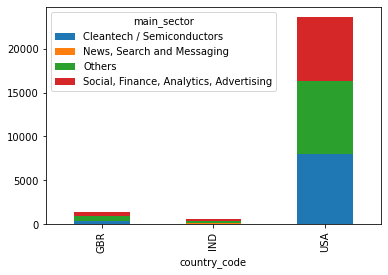

In [80]:
plt.figure(figsize=[17,20])
plt3sectors.plot(kind="bar", stacked=True)

<b>A plot showing the top 9 countries against the total amount of investments of funding type FT.<br>
This should make the top 3 countries</b>

<Figure size 720x864 with 0 Axes>

<Figure size 1224x1440 with 0 Axes>

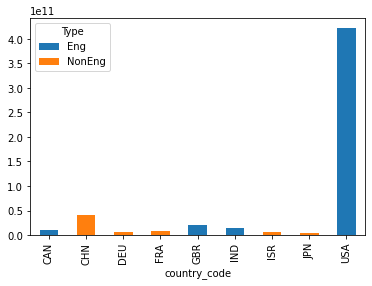

In [81]:
plt.figure(figsize=[10,12])

#top9.plot.bar(color=[top9.where(top9["country_code"].isin( ["USA", "IND", "GBR"]), 'g', 'r')])
top9["Type"] = "NonEng"
top9[0:1]['Type'] = "Eng"
top9[2:5]['Type'] = "Eng"
top9
plt.figure(figsize=[17,20])
top9countries = pd.pivot_table(data=top9, columns="Type", values="raised_amount_usd", index="country_code")
top9countries.plot(kind="bar", stacked=True)
plt.show()


<b>A plot showing the representative amount of investment in each funding type. <br>
This chart should make it clear that a certain funding type (FT) is best suited for Spark Funds.   </b>

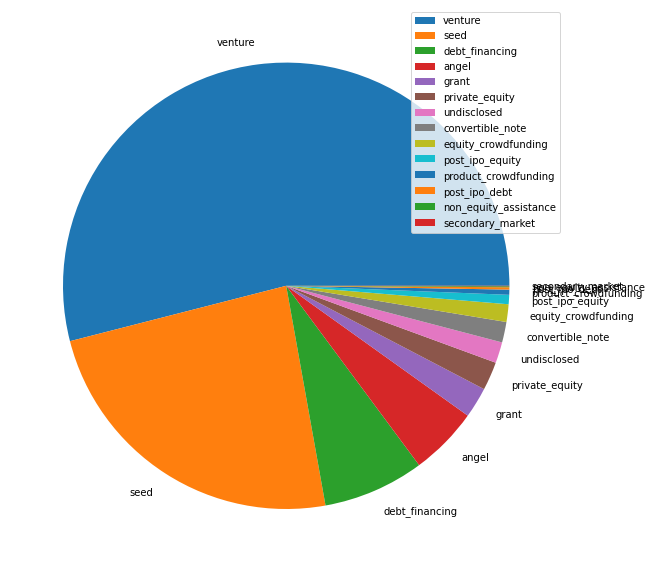

In [82]:
#plot1 = master_frame["funding_round_type"].value_counts()
plt.figure(figsize=[10,13])
investmentTypes = ['venture',              
'seed',                    
'debt_financing',          
'angel',                 
'grant',                   
'private_equity',           
'undisclosed',             
'convertible_note',        
'equity_crowdfunding',     
'post_ipo_equity',        
'product_crowdfunding',   
'post_ipo_debt',        
'non_equity_assistance',    
'secondary_market'  ]
plt.pie(plot1,  labels = investmentTypes)
plt.legend()
plt.show()

# Analysis Results:

Investment Type: <b> Venture </b> <br>
Top 3 English speaking countries are : <b> USA, GBR , IND </b> <br>
Top sector to Invest in all the 3 countries is :<b> Others</b>


-----------------------------<b>THE END</b>--------------------------